# ATTEMPTING TO USE REGULARIZATION 

In [1]:
import os
os.chdir(os.path.pardir)
print(os.getcwd())

D:\UniPi\erasmus\courses\MLCS\MLCMS-project\src


In [2]:
from utilities import plot_fd_and_original, plot_fd_and_speeds, get_all_result_data, plot_results
import matplotlib.pyplot as plt

In [3]:
### CORRIDOR_85

In [4]:
# corridor scenario
corridor_85_results = {'(1,)--1': {'tr': (0.045912862271070484, 0.0031267345031365146), 'val': (0.04742169372737408, 0.0031119121269140935), 'test': (0.0476672403847664, 0.0039469590234120335)}, 
'(2,)--1': {'tr': (0.03664128817617894, 0.003182476102173639), 'val': (0.03853945817798376, 0.0033564231210634296), 'test': (0.04050630591336996, 0.002731126083062373)}, 
'(3,)--1': {'tr': (0.033373928852379324, 0.0018829191626169833), 'val': (0.035154239647090434, 0.0018664107327763268), 'test': (0.03871563824589665, 0.0016801948788747623)}, 
'(4, 2)-0.4': {'tr': (0.030664595104753972, 0.001851953384442897), 'val': (0.03249462600797414, 0.0019940795626529786), 'test': (0.03825132212658357, 0.0019405094251864585)}, 
'(5, 2)-0.4': {'tr': (0.029973307326436043, 0.0019320427350314425), 'val': (0.03196305438876153, 0.002029259209802658), 'test': (0.03746844874792181, 0.0010017009011062954)}, 
'(5, 3)-0.4': {'tr': (0.03051294256001711, 0.002172826645295372), 'val': (0.03253234028816223, 0.0023648521244316076), 'test': (0.03710711689572175, 0.0018621574798779472)}, 
'(6, 3)-0.4': {'tr': (0.03004354938864708, 0.0021208966134423995), 'val': (0.03249930314719677, 0.0027163875850789647), 'test': (0.03759107491804222, 0.0019266819358078092)}, 
'(10, 4)-0.4': {'tr': (0.02741089586168528, 0.001986981721097928), 'val': (0.02964006066322326, 0.0021461797559127775), 'test': (0.03635013228379024, 0.0010135238565525883)}}

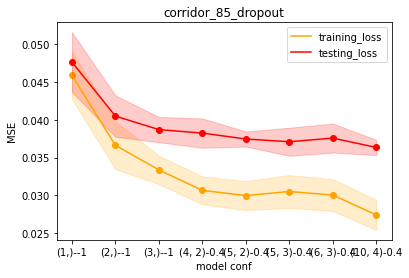

In [5]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_85_results)
plot_results(corridor_85_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_85_dropout")

In [6]:
corridor_85_results = {'(1,)': {'tr': (0.045258586704730985, 0.004853406766732973), 'val': (0.04714435026049614, 0.004653697406037759), 'test': (0.04686351530840396, 0.0012961715061691429)}, 
'(2,)': {'tr': (0.03719027779996395, 0.0020733957764011005), 'val': (0.041013209708034994, 0.0023950303734451657), 'test': (0.041472892633610745, 0.0024322010449302914)}, 
'(3,)': {'tr': (0.034038560874760156, 0.0013176987634252566), 'val': (0.03938843499869109, 0.0014865264094550156), 'test': (0.03914595563880523, 0.0010876265935449074)}, 
'(4, 2)': {'tr': (0.03526925183832645, 0.0029871246019426367), 'val': (0.04105438970029355, 0.0023958553187249138), 'test': (0.04126933727288883, 0.002845698267115585)}, 
'(5, 2)': {'tr': (0.035543992817401886, 0.0037010336212553643), 'val': (0.04197082627564668, 0.0025311766537130707), 'test': (0.04235170498124496, 0.00310823593982254)}, 
'(5, 3)': {'tr': (0.0334813929721713, 0.0037666412204319824), 'val': (0.041099048890173434, 0.003189935635059386), 'test': (0.04175731243589502, 0.003266454835106925)}, 
'(6, 3)': {'tr': (0.03116175480186939, 0.0022358561594462813), 'val': (0.03927014149725437, 0.002838615402109067), 'test': (0.039632171653358556, 0.001673111008447824)}, 
'(10, 4)': {'tr': (0.03036436103284359, 0.0047435348802268695), 'val': (0.0395459621399641, 0.003676904672583768), 'test': (0.03933931185179666, 0.002598055735067817)}}

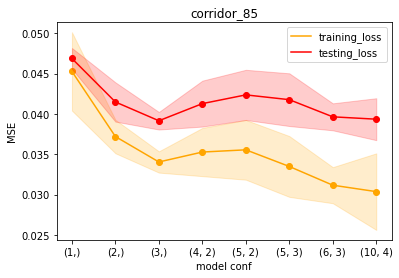

In [7]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(corridor_85_results)
plot_results(corridor_85_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="corridor_85")

### BOTTLENECK_070

In [8]:
# bottleneck scenario
bottleneck_070_results = {'(1,)--1': {'tr': (0.04420872837305069, 0.0031599580431971148), 'val': (0.04631242074072361, 0.00335683444621767), 'test': (0.04404655892877306, 0.0006008492096808868)}, '(2,)--1': {'tr': (0.04261961035430431, 0.002050199416835133), 'val': (0.045190324261784556, 0.002178216300224125), 'test': (0.04425408023114118, 0.0008173671821354187)}, '(3,)-0.2': {'tr': (0.04100157126784325, 0.0010626492394933162), 'val': (0.04339961282908916, 0.001260815392322356), 'test': (0.04458922187974386, 0.0010175661421570764)}, '(4, 2)-0.2': {'tr': (0.03906548090279102, 0.004921965053963709), 'val': (0.04078196577727795, 0.0036245149614968913), 'test': (0.046912882178146036, 0.0033055514368516012)}, '(5, 2)-0.2': {'tr': (0.03745610669255257, 0.0019795109400485966), 'val': (0.04004896491765976, 0.0020840289722979183), 'test': (0.04501635135997649, 0.002588274218708516)}, '(5, 3)-0.2': {'tr': (0.03834013599902392, 0.006017051040785215), 'val': (0.040765413381159306, 0.005984761763053988), 'test': (0.045824969932470705, 0.003220847503347146)}, '(6, 3)-0.2': {'tr': (0.0381568444147706, 0.004517518886731544), 'val': (0.040278446376323704, 0.004180930432849594), 'test': (0.04526766299581149, 0.0028434087673124566)}, '(10, 4)-0.2': {'tr': (0.0350448851287365, 0.004679395392748039), 'val': (0.03768944654613733, 0.004560997047374159), 'test': (0.04326768843836832, 0.003076716056470942)}}


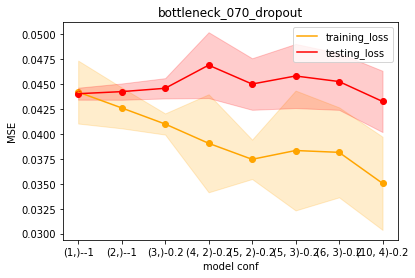

In [9]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_070_results)
plot_results(bottleneck_070_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_070_dropout")

In [10]:
bottleneck_070_results = {'(1,)': {'tr': (0.04955769553780556, 0.0057570421608399685), 'val': (0.05123388793319463, 0.005096320416198529), 'test': (0.051791704269027836, 0.005582774144924822)}, 
'(2,)': {'tr': (0.04184448003768921, 0.004760314561714955), 'val': (0.045550852119922644, 0.0046212267515334735), 'test': (0.04491133585904681, 0.0022928527407057274)}, 
'(3,)': {'tr': (0.04102290675044059, 0.003348045017959455), 'val': (0.04824198216199875, 0.004444882233662878), 'test': (0.04584651970424176, 0.002920595092481756)}, 
'(4, 2)': {'tr': (0.04031206876039505, 0.0051648797471331685), 'val': (0.048427933976054195, 0.0037716492903911523), 'test': (0.04719023609986878, 0.004526066784584657)}, 
'(5, 2)': {'tr': (0.03668047532439232, 0.003667154431939146), 'val': (0.04531076699495316, 0.0025808096847436896), 'test': (0.0461659374304043, 0.0027352878110425798)}, 
'(5, 3)': {'tr': (0.04162880904972553, 0.007151998469464794), 'val': (0.049127314463257785, 0.005513828520265613), 'test': (0.049083456967275084, 0.005650612198688121)}, 
'(6, 3)': {'tr': (0.037646884098649025, 0.005999453764399783), 'val': (0.04634510710835457, 0.004201980591786483), 'test': (0.04620908804838612, 0.0035137353907239953)}, 
'(10, 4)': {'tr': (0.036670266091823576, 0.00472639424911708), 'val': (0.04604802552610636, 0.003957607023497358), 'test': (0.045713807815980285, 0.003483159691551754)}}

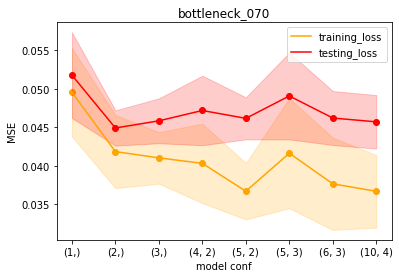

In [11]:
tr_mean, tr_std, val_mean, val_std, test_mean, test_std = get_all_result_data(bottleneck_070_results)
plot_results(bottleneck_070_results, tr_mean, tr_std, val_mean, val_std, test_mean, test_std, title="bottleneck_070")